In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import os

In [2]:
text_folder="data\Text file"

In [3]:
# Function to read text from files based on file_id
def read_text_from_file(file_id):
    file_path=os.path.join(text_folder,f'{file_id}.txt')
    try:
        with open(file_path,'r',encoding='utf-8') as file:
            return file.read()
    except FileNotFoundError:
        return ''

In [4]:
data=pd.read_csv('data\Annotations_Metadata.csv')

In [5]:
data['actual_text']=data['file_id'].apply(lambda file_id: read_text_from_file(file_id))

In [6]:
data.head()

,file_id,user_id,subforum_id,num_contexts,label,actual_text
0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been..."
1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...
2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...
3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...
4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...


In [7]:
unique_labels = data['label'].unique()
print(unique_labels)


['noHate' 'hate' 'idk/skip' 'relation']


In [20]:
unique_labels = data['label'].unique()
print(unique_labels)

[2 0 1 3]


In [8]:
# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [19]:
data.head()

,file_id,user_id,subforum_id,num_contexts,label,actual_text
0,12834217_1,572066,1346,0,2,"As of March 13th , 2014 , the booklet had been..."
1,12834217_2,572066,1346,0,2,In order to help increase the booklets downloa...
2,12834217_3,572066,1346,0,2,( Simply copy and paste the following text int...
3,12834217_4,572066,1346,0,0,Click below for a FREE download of a colorfull...
4,12834217_5,572066,1346,0,2,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...


In [9]:
# Preprocess the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['actual_text'])
sequences = tokenizer.texts_to_sequences(data['actual_text'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'], test_size=0.2, random_state=42)

In [11]:
# Build a simple LSTM model for multi-class classification
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=16, input_length=100))
model.add(LSTM(100))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Softmax for multi-class

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5


247/247 [==============================] - 24s 77ms/step - loss: 0.5033 - accuracy: 0.8674 - val_loss: 0.4778 - val_accuracy: 0.8653
Epoch 2/5
247/247 [==============================] - 20s 82ms/step - loss: 0.4665 - accuracy: 0.8674 - val_loss: 0.4770 - val_accuracy: 0.8653
Epoch 3/5
247/247 [==============================] - 22s 89ms/step - loss: 0.4661 - accuracy: 0.8674 - val_loss: 0.4757 - val_accuracy: 0.8653
Epoch 4/5
247/247 [==============================] - 23s 94ms/step - loss: 0.4657 - accuracy: 0.8674 - val_loss: 0.4743 - val_accuracy: 0.8653
Epoch 5/5
247/247 [==============================] - 19s 78ms/step - loss: 0.4661 - accuracy: 0.8674 - val_loss: 0.4736 - val_accuracy: 0.8653


In [13]:
# Evaluate model performance on the test set
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

69/69 [==============================] - 3s 29ms/step
Accuracy: 0.8748286888990406
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       225
           1       0.00      0.00      0.00        16
           2       0.87      1.00      0.93      1915
           3       0.00      0.00      0.00        33

    accuracy                           0.87      2189
   macro avg       0.22      0.25      0.23      2189
weighted avg       0.77      0.87      0.82      2189



d:\GUVI\Hate Speech\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GUVI\Hate Speech\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GUVI\Hate Speech\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


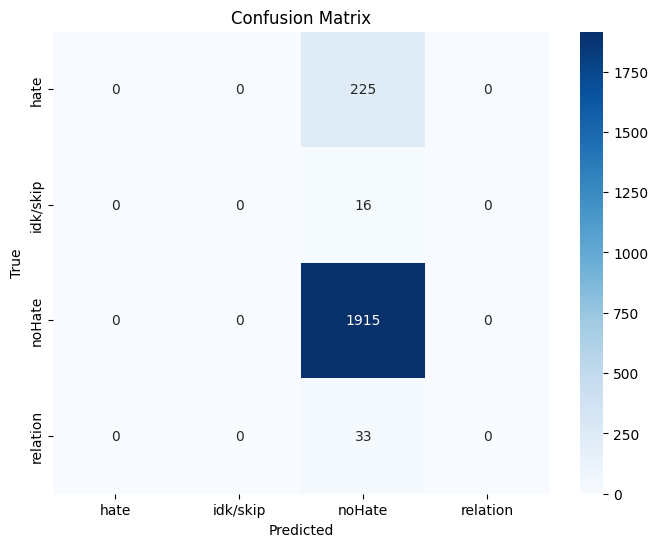

In [14]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()